<a href="https://colab.research.google.com/github/Anaqqa/4DVST---Data-Visualization/blob/main/TP_4DVST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation des biblitothèquess nécessaires

In [23]:
!pip install matplotlib seaborn plotly

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Import des données

In [40]:
# Importer le fichier CSV avec pandas
df = pd.read_csv('/content/sample_data/smartphones.csv')

Desctiption des data

In [41]:
print("Nombre de lignes :", df.shape[0])

Nombre de lignes : 980


In [42]:
df.info() #résumé du dataframe pour mieuux comprendre la structure des données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [43]:
# Afficher les 5 premières lignes du DataFrame pour vérifier qu'il a été importé correctement
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [44]:
df.describe() #Statistiques descriptives des colonnes numériques

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [45]:
# Créer un dictionnaire avec les traductions des noms de colonnes
new_column_names = {
    'brand_name': 'Marque',
    'model': 'Modèle',
    'price': 'Prix',
    'avg_rating': 'Note Moyenne',
    '5G_or_not': '5G',
    'processor_brand': 'Marque Processeur',
    'num_cores': 'Nombre de Coeurs',
    'processor_speed': 'Vitesse Processeur',
    'battery_capacity': 'Capacité Batterie',
    'fast_charging_available': 'Charge Rapide Disponible',
    'fast_charging': 'Charge Rapide',
    'ram_capacity': 'RAM',
    'internal_memory': 'Mémoire Interne',
    'screen_size': 'Taille Écran',
    'refresh_rate': 'Taux de Rafraîchissement',
    'num_rear_cameras': 'Nombre Caméras Arrière',
    'os': 'Système d''exploitation',
    'primary_camera_rear': 'Caméra Principale Arrière',
    'primary_camera_front': 'Caméra Principale Avant',
    'extended_memory_available': 'Mémoire Extensible',
    'resolution_height': 'Résolution Hauteur',
    'resolution_width': 'Résolution Largeur'
}

# Renommer les colonnes du DataFrame
df = df.rename(columns=new_column_names)

Visualisations

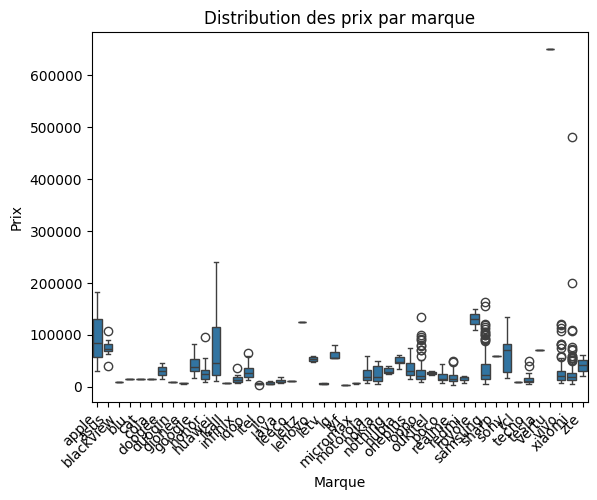

In [55]:
sns.boxplot(x='Marque', y='Prix', data=df)
plt.title('Distribution des prix par marque')
plt.xticks(rotation=45, ha='right')
plt.show()

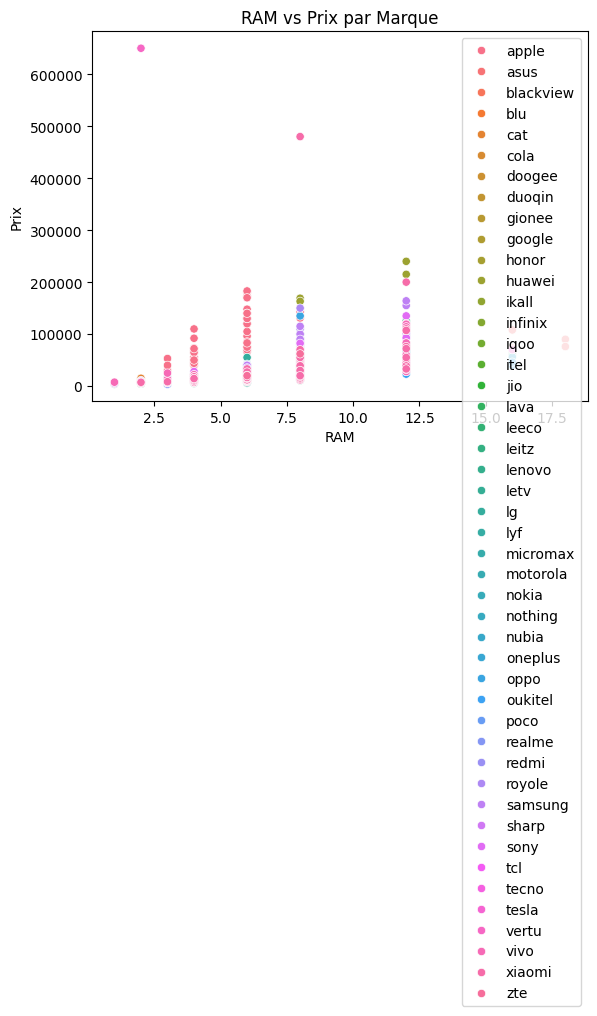

In [48]:
sns.scatterplot(x='RAM', y='Prix', hue='Marque', data=df)
plt.xlabel('RAM')
plt.ylabel('Prix')
plt.title('RAM vs Prix par Marque')
plt.legend() # adding a legend to the plot
plt.show()

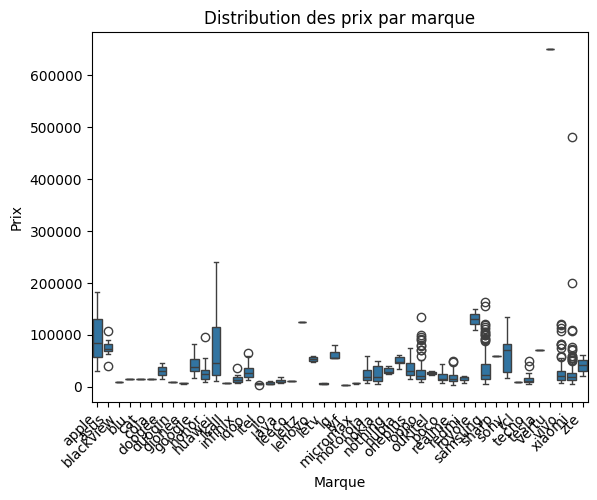

In [49]:
sns.boxplot(x='Marque', y='Prix', data=df)
plt.title('Distribution des prix par marque')
plt.xticks(rotation=45, ha='right')
plt.show()

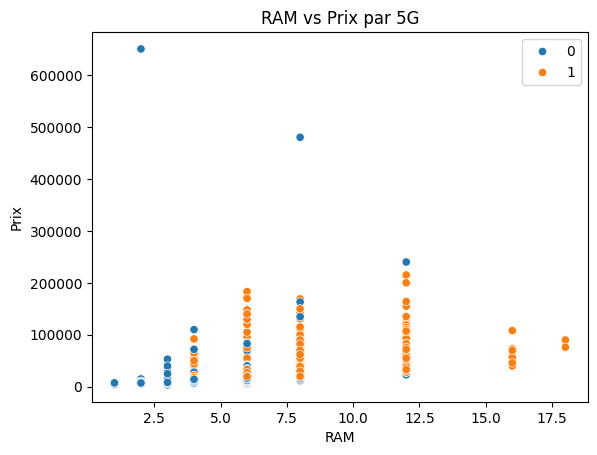

In [50]:
sns.scatterplot(x='RAM', y='Prix', hue='5G', data=df)
plt.xlabel('RAM')
plt.ylabel('Prix')
plt.title('RAM vs Prix par 5G')
plt.legend() # adding a legend to the plot
plt.show()

In [51]:
sns.violinplot(x='Système d\'exploitation', y='Note Moyenne', data=df)
plt.title('Distribution des notes par système d\'exploitation')
plt.xticks(rotation=45, ha='right')
plt.show()

ValueError: Could not interpret value `Système d'exploitation` for `x`. An entry with this name does not appear in `data`.

In [52]:
fig = px.bar(df.groupby('Marque Processeur')['Prix'].mean().reset_index(),
             x='Marque Processeur', y='Prix', title='Prix moyen par marque de processeur')
fig.update_xaxes(tickangle=45, tickmode='linear')
fig.show()

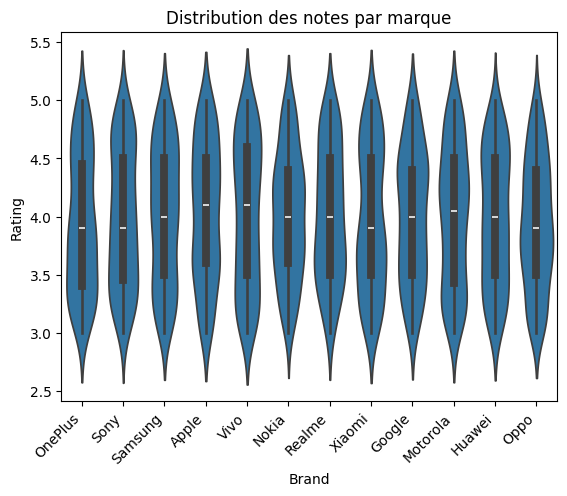

In [35]:
sns.violinplot(x='Brand', y='Rating', data=df)
plt.title('Distribution des notes par marque')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
fig = px.bar(df.groupby('Brand')['Price (USD)'].mean().reset_index(),
             x='Brand', y='Price (USD)', title='Prix moyen par marque')
fig.update_xaxes(tickangle=45, tickmode='linear')
fig.show()

In [53]:
fig = px.scatter(df, x='Taille Écran', y='Prix', size='Capacité Batterie',
                 color='Marque', title='Taille de l''écran vs Prix, avec Capacité Batterie comme taille des points',
                 hover_data=['Modèle'])
fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [54]:
fig = px.imshow(df.corr(), title='Matrice de corrélation',
                x=df.select_dtypes(include=['number']).columns,
                y=df.select_dtypes(include=['number']).columns)
fig.show()

ValueError: could not convert string to float: 'apple'